# Lasso Notebook - High performance
- RMSE: 0.0929
- Train score:  0.94
- Test score:  0.94 

    - *random_state=8 for train_test_split

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
import warnings
warnings.filterwarnings('ignore')


housing = pd.read_csv('/Users/Eugene/OneDrive/ML/ML_Project/Group/housing.csv', index_col=0)
housing.shape

(2578, 167)

In [39]:
housetarg = pd.Series(housing.SalePrice_Log, name='target')
housefeature = housing.drop('SalePrice_Log',axis=1)

In [41]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(housefeature, housetarg, random_state=8)
Xtrain.shape, Xtest.shape

((1933, 166), (645, 166))

In [43]:
import numpy as np
alphas = np.linspace(0.000001,.0001,100)

### Lasso Gridsearch CV

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#randomized is faster
from sklearn.linear_model import Lasso

In [45]:
lasso = Lasso(normalize=True)

In [46]:
grid = GridSearchCV(estimator=lasso, param_grid={'alpha':alphas}, cv=10, return_train_score=True)
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=10, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([1.0e-06, 2.0e-06, 3.0e-06, 4.0e-06, 5.0e-06, 6.0e-06, 7.0e-06,
       8.0e-06, 9.0e-06, 1.0e-05, 1.1e-05, 1.2e-05, 1.3e-05, 1.4e-05,
       1.5e-05, 1.6e-05, 1.7e-05, 1.8e-05, 1.9e-05, 2.0e-05, 2.1e-05,
       2.2e-05, 2.3e-05, 2.4e-05, 2.5e-05, 2.6e-05, 2.7e-05, 2.8e-05,
       2.9e-05, 3.0e-05, 3.1e-05, 3.2e-05, 3.3e-05, 3.4e-05,...
       5.7e-05, 5.8e-05, 5.9e-05, 6.0e-05, 6.1e-05, 6.2e-05, 6.3e-05,
       6.4e-05, 6.5e-05, 6.6e-05, 6.7e-05, 6.8e-05, 6.9e-05, 7.0e-05,
       7.1e-05, 7.2e-05, 7.3e-05, 7.4e-05, 7.5e-05, 7.6e-05, 7.7e-05,
       7.8e-05, 7.9e-05, 8.0e-05, 8.1e-05, 8.2e-05, 8.3e-05, 8.4e-05,
       8.5e-05, 8.6e-05, 8.7e-05, 8.8e-05, 8.9e-05, 9.0e-05, 9.1e-05,
       9.2e-05, 9.3e-05, 9.4e-05, 9.5e-05, 9.6e-05, 9.7e-05, 9.8e-05,
       9.9e-05, 1.0e-04])},
             return_train_score=True)

In [47]:
grid.score(Xtest,ytest)

0.9400545826079216

In [48]:
best_model = grid.best_estimator_
best_model.score(Xtest, ytest)

0.9400545826079216

In [49]:
best_model.coef_

array([ 8.22807543e-02, -0.00000000e+00,  0.00000000e+00, -4.81526910e-03,
        0.00000000e+00, -1.02607204e-03,  5.50902181e-02,  3.99583497e-02,
        2.12312998e-03,  5.75033591e-04, -0.00000000e+00, -0.00000000e+00,
        4.08496187e-01,  3.70083119e-05,  6.39057708e-03,  6.50453422e-03,
        4.01396124e-03, -0.00000000e+00,  1.26542066e-02,  3.16500435e-03,
        7.88768538e-05, -0.00000000e+00,  4.45055824e-05, -0.00000000e+00,
        7.27018868e-05,  9.70924284e-03,  5.90951078e-02, -2.59528155e-05,
       -1.33981842e-03,  2.78537949e-03, -9.44592158e-03, -5.00863844e-02,
        2.39396584e-02,  3.48770386e-03,  1.88869877e-02,  3.66663394e-02,
        0.00000000e+00,  1.30036320e-02,  2.93802174e-05,  9.05825409e-05,
        8.15505048e-05,  8.87788662e-05,  2.03338797e-04,  2.12587459e-05,
        0.00000000e+00,  1.27530453e-03, -7.34330318e-02,  0.00000000e+00,
        1.01673005e-01,  4.09310096e-02, -2.07257431e-02,  1.01822382e-02,
       -1.34717596e-02, -

In [50]:
print(grid.best_score_)
print(grid.best_params_)

0.9263563286187958
{'alpha': 2.3000000000000003e-05}


In [51]:
# print(grid.cv_results_.keys())
# print(grid.cv_results_)

In [52]:
# cv_results = pd.DataFrame(grid.cv_results_)
# cv_results

In [53]:
# cv_results.sort_values('mean_test_score', ascending=False).head(5)
# look for the best test set performance

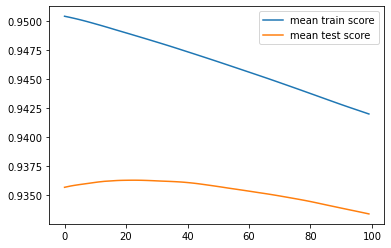

In [54]:
cv_results['mean_train_score'].plot(label='mean train score')
cv_results['mean_test_score'].plot(label='mean test score')
plt.legend(loc=1)

### Lasso model (user provides alpha)

In [55]:
lasso2 = Lasso(alpha=2.3000000000000003e-05, normalize=True)
lasso2.get_params()

{'alpha': 2.3000000000000003e-05,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [56]:
lasso2.fit(Xtrain,ytrain)

Lasso(alpha=2.3000000000000003e-05, normalize=True)

In [57]:
print('Train score: ', lasso2.score(Xtrain,ytrain))
print('Test score: ', lasso2.score(Xtest,ytest))

Train score:  0.9400236096298805
Test score:  0.9400545826079216


In [59]:
print('the intercept is: %.2f' %(lasso2.intercept_))
coefs = pd.Series(lasso2.coef_, index=housefeature.columns)

the intercept is: 4.69


In [60]:
coefs.sort_values(ascending=False).head(30)

Neighborhood__GrnHill     0.449400
GrLivArea_Log             0.408496
Exterior1st__PreCast      0.344824
Neighborhood__StoneBr     0.113066
Neighborhood__Crawfor     0.110719
SaleCondition__Alloca     0.102508
Exterior1st__BrkComm      0.101673
Heating__Wall             0.093280
LotArea_Log               0.082281
Neighborhood__NridgHt     0.079984
Neighborhood__NoRidge     0.079599
Foundation__Stone         0.079055
Neighborhood__Blueste     0.075010
Neighborhood__Somerst     0.073867
Neighborhood__NPkVill     0.067495
Neighborhood__Greens      0.062960
CentralAir                0.059095
OverallQual               0.055090
Neighborhood__BrkSide     0.054691
MSSubClass__75            0.053239
SaleCondition__Partial    0.050381
Neighborhood__ClearCr     0.042415
Exterior1st__BrkFace      0.040931
OverallCond               0.039958
Neighborhood__BrDale      0.038936
GarageCars                0.036666
Heating__GasW             0.030494
KitchenQual               0.023940
HouseStyle__SFoyer  

### Calculate RMSE

In [61]:
mse = np.mean((lasso2.predict(Xtest)-ytest)**2)
mse

0.008638363807278506

In [62]:
RMSE = np.sqrt(mse)
RMSE

0.09294279857675099